<a href="https://colab.research.google.com/github/yumulniccolofranco-plp/2B-Group8-Lab3/blob/main/PlatTechMidtermAct1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of Research:**

# **Predicting Future Typhoon Patterns in the Philippines Based on Historical Trends**

By Ashley Bolanos, Reina Joaquin, and Niccolo Yumul


**Background of the Study:**

The Philippines faces typhoons almost every year, bringing strong winds and heavy rains that often cause flooding and damage across different parts of the country. Because of its location along the Pacific Ocean, it is one of the places most exposed to these natural disasters. Each typhoon affects not only people’s safety but also the economy, agriculture, and daily life. This constant threat makes it important to study how typhoons behave and how often they occur.

In recent years, people have noticed changes in the number and timing of typhoons that hit the Philippines. Some years have more storms than others, and their strength also seems to vary. These changes raise questions about whether typhoons are becoming more frequent or intense. To better understand these patterns, it is helpful to look at records from the past years and analyze how they have changed over time.

This study focuses on typhoon activity in the Philippines from 2014 to 2024 and aims to use that data to predict possible trends for 2026. By finding patterns and understanding how typhoons have behaved in the past, this research hopes to provide insights that can help in preparing for future storms. The results may also be useful for disaster readiness programs and government planning, helping communities become safer and more prepared.

*TODO: Make it more concise and shorter. More focus sana if anong columns and factors namagprepredict sa Typhoon. Limit the justification to one paragraph or even one sentence.*

**Source of Data:**

*TODO: Write a short background on the dataset. Use the information available in the dataset website.*

**Brief Description of Dataset**

*TODO: Data Dimensions and Meaning of each variable*

**Selected Features (Independent Variables)**

*TODO: Write this*

** Target / Label Column (Dependent Variable)

**Program:**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Open File
df = pd.read_csv('philippines_typhoon_monthly_2014_2024.csv')

In [ ]:
df.head()

,Year,Month,Number_of_Typhoons,ONI,Nino3.4_SST_anomaly,Western_Pacific_SST,Vertical_Wind_Shear,Midlevel_Humidity,SeaLevelPressure,MJO_Phase,Prev_month_typhoons
0,2014,1,1,0.03,-0.05,0.36,13.2,54.8,1009.8,0,0
1,2014,2,0,0.20,0.18,-0.43,13.8,59.5,1009.5,7,1
2,2014,3,0,0.02,0.00,0.01,13.0,49.3,1009.4,6,0
3,2014,4,0,0.13,0.07,-0.15,10.7,57.8,1008.2,0,0
4,2014,5,0,-0.03,-0.05,-0.41,11.1,61.4,1008.1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 132 non-null    int64  
 1   Month                132 non-null    int64  
 2   Number_of_Typhoons   132 non-null    int64  
 3   ONI                  132 non-null    float64
 4   Nino3.4_SST_anomaly  132 non-null    float64
 5   Western_Pacific_SST  132 non-null    float64
 6   Vertical_Wind_Shear  132 non-null    float64
 7   Midlevel_Humidity    132 non-null    float64
 8   SeaLevelPressure     132 non-null    float64
 9   MJO_Phase            132 non-null    int64  
 10  Prev_month_typhoons  132 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 11.5 KB


In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df['Timestamp'] = df['Date'].map(pd.Timestamp.toordinal)

In [ ]:
features = [
    'ONI',
    'Nino3.4_SST_anomaly',
    'Western_Pacific_SST',
    'Vertical_Wind_Shear',
    'Midlevel_Humidity',
    'SeaLevelPressure',
    'MJO_Phase',
    'Prev_month_typhoons',
]

X = df[features]
y = df['Number_of_Typhoons']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1.6252244233133128
R² Score: 0.4421899225068715


In [ ]:
next_date = df['Date'].max() + pd.DateOffset(months=1)
next_timestamp = next_date.toordinal()

In [ ]:
last_row = df.iloc[-1].copy()
next_features = np.array([[
    last_row['ONI'],
    last_row['Nino3.4_SST_anomaly'],
    last_row['Western_Pacific_SST'],
    last_row['Vertical_Wind_Shear'],
    last_row['Midlevel_Humidity'],
    last_row['SeaLevelPressure'],
    last_row['MJO_Phase'],
    last_row['Prev_month_typhoons'],
]])

next_prediction = model.predict(next_features)
print(f"Predicted number of typhoons for {next_date.strftime('%B %Y')}: {next_prediction[0]:.2f}")

Predicted number of typhoons for January 2025: 1.27


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


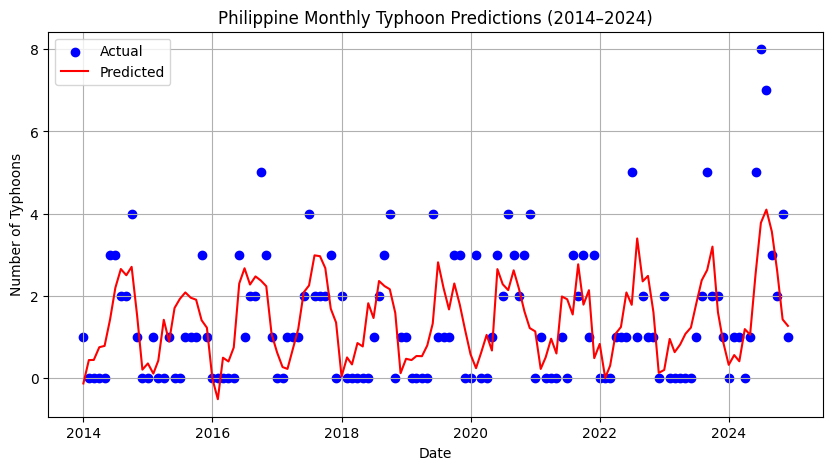

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df['Date'], y, color='blue', label='Actual')
plt.plot(df['Date'], model.predict(X), color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Number of Typhoons')
plt.title('Philippine Monthly Typhoon Predictions (2014–2024)')
plt.legend()
plt.grid(True)
plt.show()